# Discord Profile Picture Generator

### Integrantes:
- Pedro Pablo Arriola Jimenez (20188)
- Marco Pablo Orozco Saravia (20857)
- Santiago Taracena Puga (20017)

## Descripción del Proyecto

Este proyecto tiene como objetivo generar imágenes de perfil de personajes de anime utilizando Redes Antagónicas Generativas (GANs) con PyTorch. Estas imágenes pueden ser utilizadas como fotos de perfil en Discord o en cualquier otra plataforma que permita la personalización de avatares.

### Parte 1 - Importacion de librerias

In [1]:
# Importar las bibliotecas necesarias
%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Establecer una semilla aleatoria para la reproducibilidad
manualSeed = 8000
print("Semilla Aleatoria: ", manualSeed)

# Inicializar la semilla aleatoria
random.seed(manualSeed)

# Inicializar la semilla en PyTorch
torch.manual_seed(manualSeed)

# Utilizar algoritmos determinísticos para garantizar resultados reproducibles
torch.use_deterministic_algorithms(True) 

Semilla Aleatoria:  8000


### Parte 2 - Carga del dataset

In [14]:
# Directorio raíz para el conjunto de datos
dataroot = "/Users/unclepete/Documents/discord-pfp-gen/kaggle/"

# Número de trabajadores para el cargador de datos
workers = 2

# Tamaño del lote durante el entrenamiento
batch_size = 128

# Tamaño espacial de las imágenes de entrenamiento. Todas las imágenes se redimensionarán a este tamaño.
image_size = 64

# Número de canales en las imágenes de entrenamiento. Para imágenes a color, esto es 3.
nc = 3

# Tamaño del vector latente z (es decir, tamaño de la entrada del generador)
nz = 200

# Tamaño de los mapas de características en el generador
ngf = 64

# Tamaño de los mapas de características en el discriminador
ndf = 64

# Número de épocas de entrenamiento
num_epochs = 100

# Tasa de aprendizaje para los optimizadores
lr = 0.0005

# Hiperparámetro Beta1 para los optimizadores Adam
beta1 = 0.6

# Número de GPUs disponibles. Utilice 0 para el modo CPU.
ngpu = 1

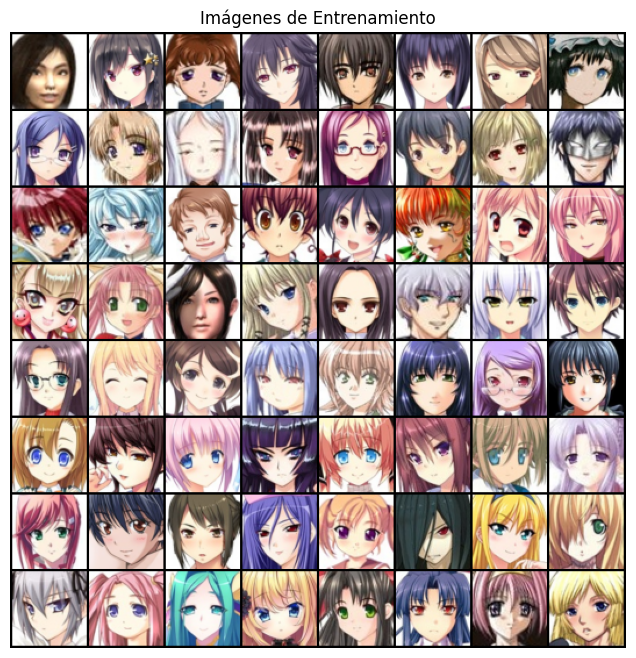

In [15]:
# Crear el conjunto de datos
# Utilizamos la clase ImageFolder para cargar imágenes desde el directorio especificado en 'dataroot'.
# Las transformaciones se aplican a las imágenes: redimensionar, recortar al centro, convertir a tensor y normalizar.
dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),          # Redimensionar la imagen
                               transforms.CenterCrop(image_size),      # Recortar al centro
                               transforms.ToTensor(),                  # Convertir la imagen a un tensor
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),  # Normalizar
                           ]))

# Crear el cargador de datos (dataloader)
# Este manejará el muestreo de lotes de datos para el entrenamiento.
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)

# Decidir en qué dispositivo queremos ejecutar el modelo
# Si hay una GPU disponible y ngpu > 0, usaremos CUDA. De lo contrario, usaremos la CPU.
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

# Mostrar algunas imágenes de entrenamiento
# Aquí tomamos un lote de imágenes del cargador de datos y las visualizamos.
real_batch = next(iter(dataloader))
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Imágenes de Entrenamiento")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(), (1, 2, 0)))